# Visualizing K- Nearest Neighbors

In [19]:
# Loading the libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,cross_val_score,KFold,GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler

In [20]:
# Loading the data set 
data= pd.read_csv("./adult.data.csv",sep=',',header=None)

In [21]:
# Adding the column headers
data.columns = [
    "Age", "WorkClass", "fnlwgt", "Education", "EducationNum",
    "MaritalStatus", "Occupation", "Relationship", "Race", "Gender",
    "CapitalGain", "CapitalLoss", "HoursPerWeek", "NativeCountry", "Income"
]

In [22]:
data.dtypes

Age               int64
WorkClass        object
fnlwgt            int64
Education        object
EducationNum      int64
MaritalStatus    object
Occupation       object
Relationship     object
Race             object
Gender           object
CapitalGain       int64
CapitalLoss       int64
HoursPerWeek      int64
NativeCountry    object
Income           object
dtype: object

In [23]:
data.head()

,Age,WorkClass,fnlwgt,Education,EducationNum,MaritalStatus,Occupation,Relationship,Race,Gender,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [24]:
# Checking for null values 
data.isnull().values.any()

False

# Data Cleaning 



There are columns in the dat set which contains empty spaces and also some columns have ? as column values.
Hence here we are removing such rows contiang ? values and we are strriping off the white space.


In [25]:
data.applymap(lambda x: x.strip() if type(x)==str else x)


In [26]:
# Removing all the rows which contains ? mark values
data = data[(data != '?' ).all(axis=1)]


In [27]:
data.shape

(30162, 15)


# Viz-1

# Education vs Income 

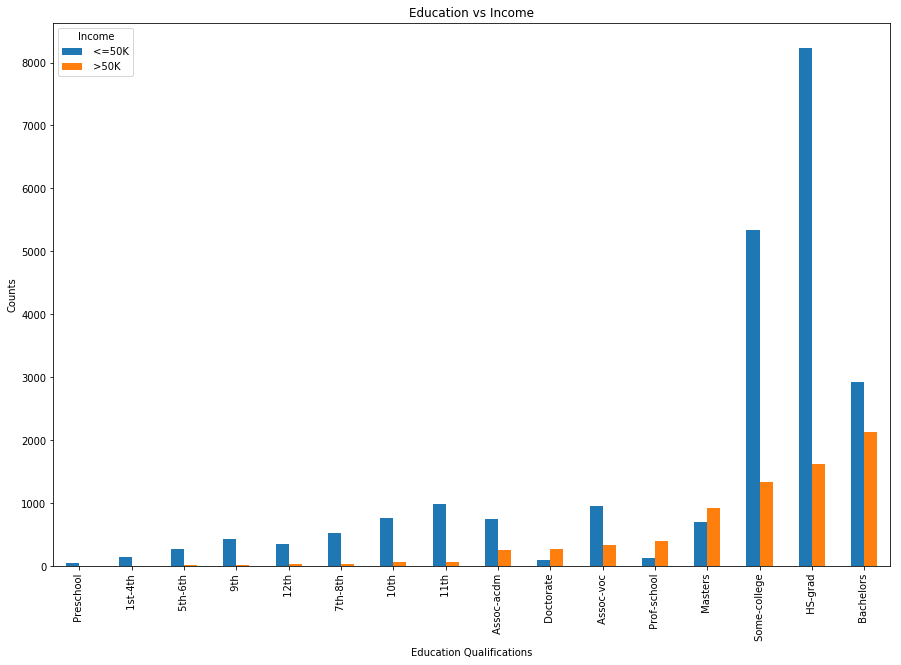

In [28]:

dfincome_occupation=pd.DataFrame(pd.crosstab(data.Education, data.Income))
dfincome_occupation.sort_values(by = ' >50K',inplace=True)
dfincome_occupation.plot(kind='bar',figsize=(15,10))
plt.title('Education vs Income')
plt.ylabel('Counts')
plt.xlabel('Education Qualifications')
plt.show()

The above grouped bar chart describes about the numbercount  of adults who is 
earning the income <=50k or >50k for each occupation.
The Income attribute is encoded using the colour channel.
As we can see from the plot people having higher professional degrees are likely to earn more salary.
The bar chart is used as it best represents the counts for each level of income for each eduation level.
From this plot we can get an overview of proportions of income levels over various education levels.

Ref: https://drive.google.com/file/d/1FmLjam9Ncnz03Hl5If_sVxRjU9DO9NlZ/view

# Viz-2

# Distribution of Hours Per Week for each Occupation

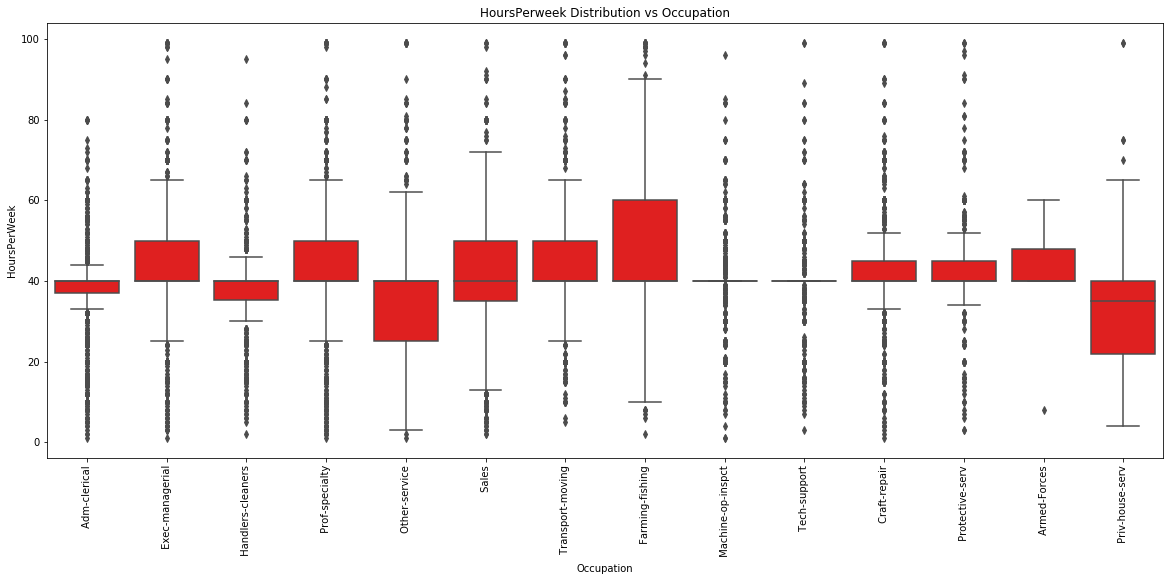

In [29]:

fig, ax = plt.subplots(figsize=(20,8))
ax = sns.boxplot(x="Occupation", y="HoursPerWeek",
                    data= data,color='red')
plt.xticks(rotation=90)
plt.title('HoursPerweek Distribution vs Occupation')
plt.show()

The above box plot shows the distribution of the no of working hours per week for each Occupation.
From this plot we can see the grouped statistics of number of working hours[min, first-quartile (Q1), median, 
third-quartile (Q3), max] for each occupation and it also encodes the variance on how the data is spread.
As we can see from the plot most of the occupation has a general 40 hours per week as the median value. 
but some occupations like fishing and farming had different number of working hours compared to other office jobs.
And also for the Priv - House Servants have different working hours than other occupations.

From the above plot we can get an overiew of the common number of hours per week for each occupation.

Ref: https://drive.google.com/file/d/1FmLjam9Ncnz03Hl5If_sVxRjU9DO9NlZ/view

# Data PreProcessing 

In [30]:

#map the input colum to 0,1 
map_income={' <=50K':0,' >50K':1}
data['Income']=data['Income'].map(map_income).astype(int)



Inorder for the dat to fit into the model we need only numeric variables. SO we are converting 
all the categorical variables into one hot encoding vectors for each levels by adding dummy columns

The continous variables are further all scled into the same range of values 
here we are specifing the range (0,1) to be taken for all the continous variables using Min-Max scaler.

In [31]:
# one hot encoding for all the categorical variables 

data_cat_1hot = pd.get_dummies(data.select_dtypes('object'))
data_non_cat = data.select_dtypes(exclude = 'object')

data_1hot = pd.concat([data_non_cat, data_cat_1hot], axis=1, join='inner')

In [ ]:
# dimensions of new data frame 

In [32]:
data_1hot.shape

(30162, 105)

In [33]:
# splitting the data into train and test with 80-20 split
X=data_1hot.loc[:, data_1hot.columns != 'Income']
y=data_1hot['Income']
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.20,shuffle=True)


In [ ]:
#Scaling the continous variables 

In [34]:
# Scaling the training data with Min max Scaler 

scaler = MinMaxScaler(feature_range=(0, 1), copy=True)

# Fitting only on training data
scaler.fit(x_train)  
train_data = scaler.transform(x_train)  

# Applying same transformation to test data
test_data = scaler.transform(x_test)


# Grid search for K-NN

In [36]:

knn = KNeighborsClassifier()

param_grid = {'n_neighbors': np.arange(1, 11),'p': [1,2]}

knn_gscv = GridSearchCV(knn, param_grid, cv=10,scoring='accuracy',return_train_score=True)

knn_gscv.fit(x_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]), 'p': [1, 2]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [37]:
knn_gscv.best_params_

{'n_neighbors': 10, 'p': 1}

# Evaluation Metric 

Here we choose accuracy as a evaluation metric to assess the performance, Since it is a classification Task. 
Accuracy = (tp+fn)/(tp+fn+tn+fp)


In [ ]:
# Retrieving the results of test from the fitted model 

In [38]:
res= pd.DataFrame(knn_gscv.cv_results_)

In [39]:
# filtering the reults by p=2
res_2=res[res['param_p']==2]

In [40]:
# Getting the test scores for each split 
test_score = [[] for i in range(10)]
for i in range(10):
    for k in range(10):
        test_score[i].append(res_2.iloc[i]["split"+str(k)+"_test_score"])
        

# Viz- 3

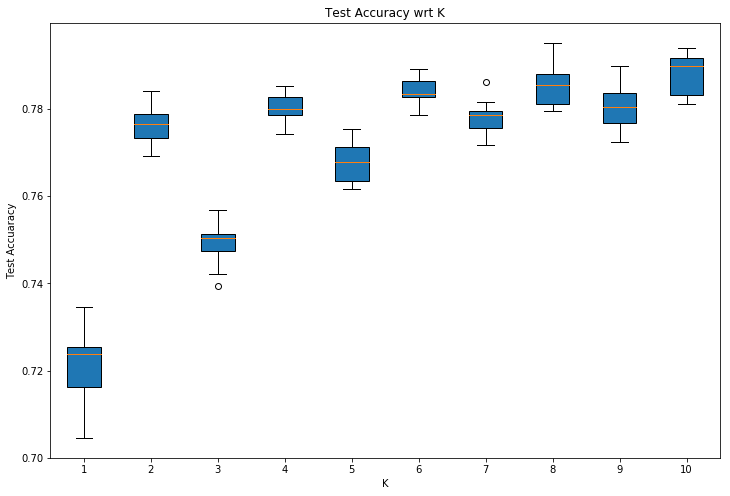

In [41]:
fig = plt.figure(1, figsize=(12, 8))
ax = fig.add_subplot(111)
# Create the boxplot
bp = ax.boxplot(test_score,patch_artist=True)
plt.xlabel("K")
plt.ylabel("Test Accuaracy")
plt.title('Test Accuracy wrt K')
plt.show()

The above box plot gives the distribution and spread of test accuracies (hold out set in each split) 
for different values of K. 
As from the plot we can see that the best accuracy is acheived for k=10.
So the optimal parameters for our algorithm is 10 neighbors.

Ref: https://drive.google.com/file/d/1FmLjam9Ncnz03Hl5If_sVxRjU9DO9NlZ/view


# Performance on Test Data 

In [42]:

best_est = knn_gscv.best_estimator_
y_pred = best_est.predict(test_data)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7498756837394331


So we are getting an accuracy of 0.749 for the unseen test dataset.
